In [1]:
import plasma_params as pp
import numpy as np
import pytplot
import pyspedas

In [2]:
tr = ['2018-06-06', '2018-06-07']
from pyspedas.erg import mgf, pwe_ofa, orb
mgf(trange=tr)
pwe_ofa(trange=tr)
orb(trange=tr)

02-Jun-23 15:18:17: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2018/06/
02-Jun-23 15:18:17: File is current: erg_data/satellite/erg/mgf/l2/8sec/2018/06/erg_mgf_l2_8sec_20180606_v03.04.cdf
02-Jun-23 15:18:17: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Jun-23 15:18:17: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

02-Jun-23 15:18:18: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2018/06/
02-Jun-23 15:1

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Jun-23 15:18:18: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Jun-23 15:18:19: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2018/


 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Jun-23 15:18:19: File is current: erg_data/satellite/erg/orb/def/2018/erg_orb_l2_20180606_v03.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


['erg_orb_l2_pos_llr',
 'erg_orb_l2_pos_gse',
 'erg_orb_l2_pos_gsm',
 'erg_orb_l2_pos_sm',
 'erg_orb_l2_pos_rmlatmlt',
 'erg_orb_l2_pos_eq',
 'erg_orb_l2_pos_iono_north',
 'erg_orb_l2_pos_iono_south',
 'erg_orb_l2_pos_blocal',
 'erg_orb_l2_pos_blocal_mag',
 'erg_orb_l2_pos_beq',
 'erg_orb_l2_pos_beq_mag',
 'erg_orb_l2_pos_Lm',
 'erg_orb_l2_vel_gse',
 'erg_orb_l2_vel_gsm',
 'erg_orb_l2_vel_sm',
 'erg_orb_l2_spn_num',
 'erg_orb_l2_man_prep_flag',
 'erg_orb_l2_man_on_flag',
 'erg_orb_l2_eclipse_flag']

In [3]:
pyspedas.tinterpol('erg_orb_l2_pos_rmlatmlt','erg_mgf_l2_magt_8sec', newname='erg_orb_l2_pos_rmlatmlt_intpl')

02-Jun-23 15:18:19: tinterpol (linear) was applied to: erg_orb_l2_pos_rmlatmlt_intpl


In [4]:
pytplot.split_vec('erg_orb_l2_pos_rmlatmlt_intpl')

['erg_orb_l2_pos_rmlatmlt_intpl_x',
 'erg_orb_l2_pos_rmlatmlt_intpl_y',
 'erg_orb_l2_pos_rmlatmlt_intpl_z']

In [5]:
omega_eq = pp.Q/pp.ME*pytplot.data_quants['erg_mgf_l2_magt_8sec']*1e-9*pytplot.data_quants['erg_orb_l2_pos_rmlatmlt_intpl_x']**3*np.cos(pytplot.data_quants['erg_orb_l2_pos_rmlatmlt_intpl_y']*np.pi/180.0)**6/(4-3*np.cos(pytplot.data_quants['erg_orb_l2_pos_rmlatmlt_intpl_y']*np.pi/180.0)**(1/2))

In [6]:
pytplot.data_quants['erg_mgf_l2_magt_8sec']

<xarray.DataArray 'erg_mgf_l2_magt_8sec' (time: 10798)>
array([5208.58352851, 5243.98131208, 5279.54651447, ...,  218.04325866,
        217.85354133,  217.592238  ])
Coordinates:
  * time     (time) datetime64[ns] 2018-06-05T23:59:59.043954 ... 2018-06-06T...
Attributes:
    CDF:           {'VATT': {'FIELDNAM': 'Bt', 'CATDESC': '8 sec resolution t...
    data_att:      {'coord_sys': '', 'units': 'nT', 'depend_1_units': 'nT', '...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [7]:
omega_eq

<xarray.DataArray (time: 10798)>
array([             nan, 4972668.41493728, 4985745.24175916, ...,
       1444984.87407181, 1452120.43896467, 1448363.12068291])
Coordinates:
  * time     (time) datetime64[ns] 2018-06-05T23:59:59.043954 ... 2018-06-06T...
Attributes:
    CDF:           {'VATT': {'FIELDNAM': 'Bt', 'CATDESC': '8 sec resolution t...
    data_att:      {'coord_sys': '', 'units': 'nT', 'depend_1_units': 'nT', '...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [9]:
pytplot.store_data('omega_eq', data={'x': pytplot.data_quants['erg_mgf_l2_magt_8sec']['time'], 'y': omega_eq})

True

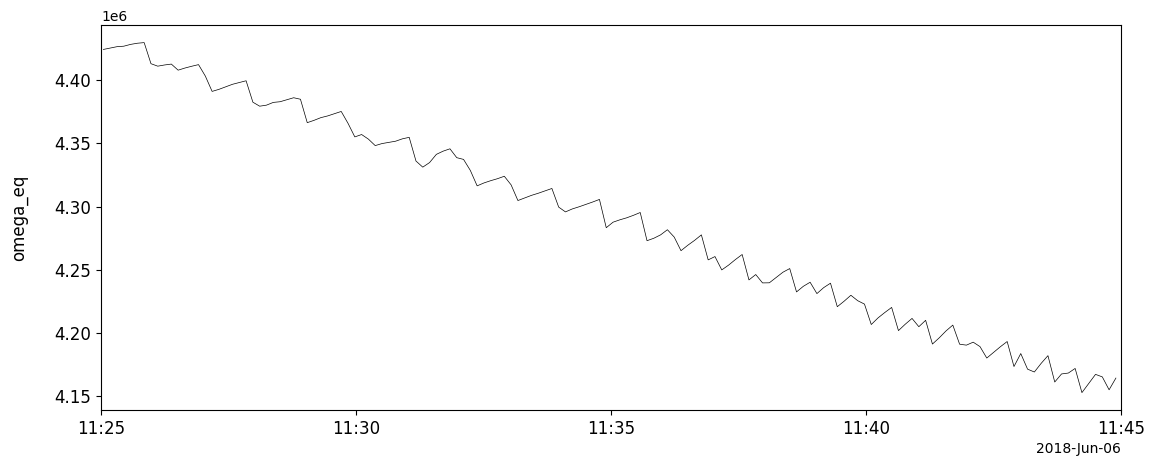

In [10]:
pytplot.xlim('2018-06-06 11:25:00', '2018-06-06 11:45:00')
pytplot.tplot(['omega_eq'])

In [6]:
pytplot.tplot_names

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_pwe_ofa_l2_spec_epoch_e132
20 : erg_pwe_ofa_l2_spec_E_spectra_132
21 : erg_pwe_ofa_l2_spec_quality_flag_e132
22 : erg_pwe_ofa_l2_spec_epoch_b132
23 : erg_pwe_ofa_l2_spec_B_spectra_132
24 : erg_pwe_ofa_l2_spec_quality_flag_b132
25 : erg_orb_l2_pos_llr
26 : erg_orb_l2_pos_gse
27 : erg_orb_l2_pos_gsm
28 : erg_orb_l2_pos_sm
29 : erg_orb_l2_pos_rmlatmlt
30 : erg_orb_l2_pos_eq
31 : erg_orb_l2_pos_iono_north
32 : erg_orb_l2_pos_iono_south
33 : erg_orb_l2

['erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg_mgf_l2_quality_8sec_gc',
 'erg_mgf_l2_igrf_8sec_dsi',
 'erg_mgf_l2_igrf_8sec_gse',
 'erg_mgf_l2_igrf_8sec_gsm',
 'erg_mgf_l2_igrf_8sec_sm',
 'erg_pwe_ofa_l2_spec_epoch_e132',
 'erg_pwe_ofa_l2_spec_E_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_e132',
 'erg_pwe_ofa_l2_spec_epoch_b132',
 'erg_pwe_ofa_l2_spec_B_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_b132',
 'erg_orb_l2_pos_llr',
 'erg_orb_l2_pos_gse',
 'erg_orb_l2_pos_gsm',
 'erg_orb_l2_pos_sm',
 'erg_orb_l2_pos_rmlatmlt',
 'erg_orb_l2_pos_eq',
 'erg_orb_l2_pos_iono_north',
 'erg_orb_l2_pos_iono_south',
 'erg_orb_l2_pos_blocal',
 'erg_orb_l2